In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
import descriptive as de
import parse_data as pa
import classical as cl

In [3]:
# Multiple regression analysis

df_clean = pa.df[['Happiness','GDP','Social Support','Health','Freedom','Generosity']].dropna()

y_clean = df_clean['Happiness']
x_clean = df_clean[['GDP','Social Support','Health','Freedom','Generosity']]

x_train, x_test, y_train, y_test = train_test_split(
    x_clean, y_clean, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

coef = pd.Series(model.coef_, index=x_clean.columns)
print(coef)

R2: 0.7860478421965846
GDP               0.578175
Social Support    1.488922
Health            1.084684
Freedom           1.895863
Generosity       -0.182980
dtype: float64


In [4]:
# Multiple regression analysis ( Standardized )

scaler = StandardScaler()

x_std = scaler.fit_transform(x_clean)

x_train, x_test, y_train, y_test = train_test_split(
    x_std, y_clean, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

coef = pd.Series(model.coef_, index=x_clean.columns)
print(coef)

R2: 0.7860478421965843
GDP               0.227287
Social Support    0.521895
Health            0.237136
Freedom           0.336245
Generosity       -0.010930
dtype: float64


Data shape:    (145, 2)
Labels shape:  (145,)


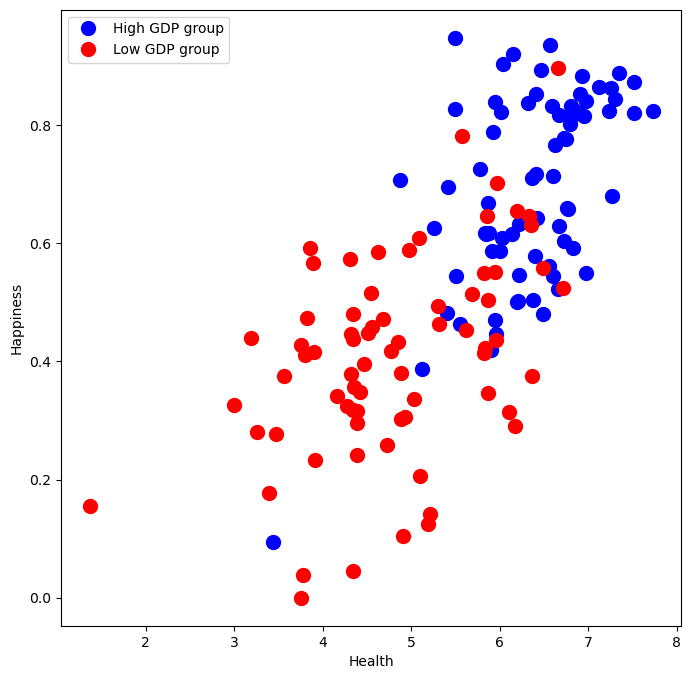

In [5]:

GDP_group = (df_clean['GDP'] >= df_clean['GDP'].median()).map(
    {True: 0, False: 1}
)

x = df_clean[['Happiness','Health']].values

print( f'Data shape:    {x.shape}'  )
print( f'Labels shape:  {GDP_group.shape}'  )


plt.figure(figsize=(8,8))
ax = plt.axes()
x0 = x[GDP_group==0]
x1 = x[GDP_group==1]
ax.plot( x0[:,0], x0[:,1], 'bo', ms=10, label='High GDP group')
ax.plot( x1[:,0], x1[:,1], 'ro', ms=10, label='Low GDP group' )
ax.set_xlabel('Health')
ax.set_ylabel('Happiness')
ax.legend()
plt.show()    

In [6]:
x_train, x_test, labels_train, labels_test = train_test_split(x, GDP_group, test_size=0.33, random_state=1)

print( f'Training data shape:    {x_train.shape}'  )
print( f'Test data shape:        {x_test.shape}'  )
print( f'Training labels shape:  {labels_train.shape}'  )
print( f'Test labels shape:      {labels_test.shape}'  )

Training data shape:    (97, 2)
Test data shape:        (48, 2)
Training labels shape:  (97,)
Test labels shape:      (48,)


Classification rate (training) = 0.8350515463917526
Classification rate (test)     = 0.875


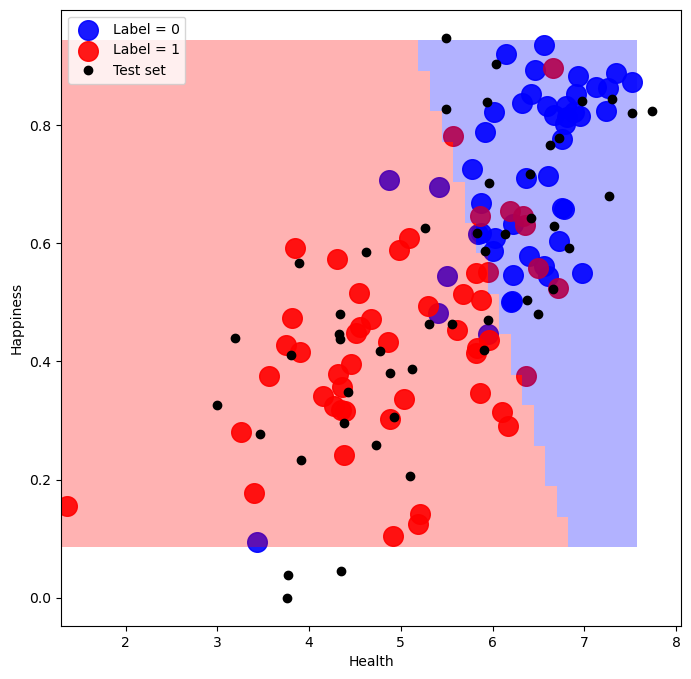

In [7]:
def plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Health')
    ax.set_ylabel('Happiness')
    ax.legend()
    

# create and train a classifier:
mlp    = MLPClassifier(solver='lbfgs', alpha=2, hidden_layer_sizes=(50, 20), max_iter=500, random_state=0)
mlp.fit(x_train, labels_train)


# calculate the CRs for the training and test sets":
labels_pred_train = mlp.predict(x_train)
labels_pred_test  = mlp.predict(x_test)
cr_train          = accuracy_score(labels_train, labels_pred_train)
cr_test           = accuracy_score(labels_test, labels_pred_test)
print( f'Classification rate (training) = {cr_train}' )
print( f'Classification rate (test)     = {cr_test}' )


# plot the decision surface:
plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x_train, labels_train, colors=['b','r'])
plt.plot(x_test[:,0], x_test[:,1], 'ko', label='Test set')
plt.legend()
plt.show()

Classification rate (training) = 0.7835051546391752
Classification rate (test)     = 0.8541666666666666


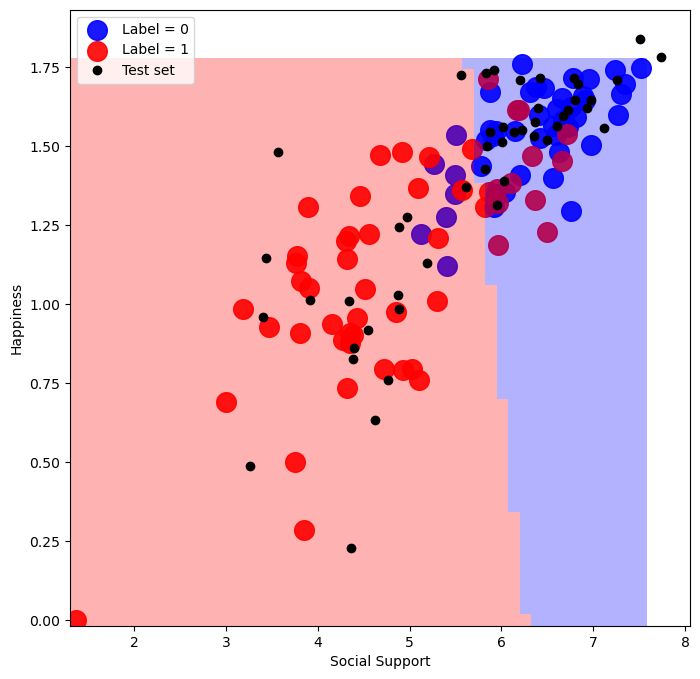

In [8]:
s = df_clean[['Happiness','Social Support']].values
s_train, s_test, s_labels_train, s_labels_test = train_test_split(s, GDP_group, test_size=0.33, random_state=50)

def s_plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    stratify  = GDP_group
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Social Support')
    ax.set_ylabel('Happiness')
    ax.legend()

# create and train a classifier:
s_mlp    = MLPClassifier(solver='lbfgs', alpha=10, hidden_layer_sizes=(50, 20), max_iter=500, random_state=0)
s_mlp.fit(s_train, s_labels_train)


# calculate the CRs for the training and test sets":
s_labels_pred_train = s_mlp.predict(s_train)
s_labels_pred_test  = s_mlp.predict(s_test)
s_cr_train          = accuracy_score(s_labels_train, s_labels_pred_train)
s_cr_test           = accuracy_score(s_labels_test, s_labels_pred_test)
print( f'Classification rate (training) = {s_cr_train}' )
print( f'Classification rate (test)     = {s_cr_test}' )


# plot the decision surface:
plt.figure(figsize=(8,8))
s_plot_decision_surface(s_mlp, s_train, s_labels_train, colors=['b','r'])
plt.plot(s_test[:,0], s_test[:,1], 'ko', label='Test set')
plt.legend()
plt.show()

In [9]:
import warnings
warnings.filterwarnings('ignore')   # this will suppress warning from sklearn

ALPHA   = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 5, 10 ]
niter   = 5  # number of iterations for each ALPHA value

np.random.seed(0)

CR      = []
for alpha in ALPHA:
    cr  = []
    for i in range(niter):
        x_train, x_test, labels_train, labels_test = train_test_split(x, GDP_group, test_size=0.33)
        mlp    = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(50, 20), max_iter=1000)
        mlp.fit(x_train, labels_train)
        labels_pred_test  = mlp.predict(x_test)
        cr_test           = accuracy_score(labels_test, labels_pred_test)
        cr.append( cr_test )
    CR.append( cr )

CR      = np.array(CR)

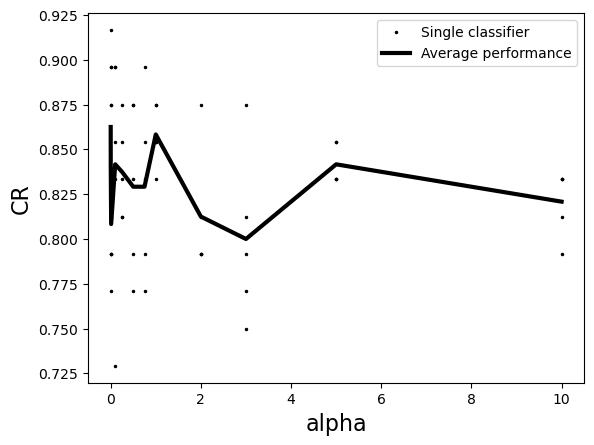

In [10]:

plt.figure()
ax = plt.axes()
h0 = ax.plot(ALPHA, CR, 'k.', ms=3)[0]
h1 = ax.plot(ALPHA, CR.mean(axis=1), 'k-', lw=3, label='Average CR')[0]
ax.legend([h0,h1], ['Single classifier', 'Average performance'])
ax.set_xlabel('alpha', size=16)
ax.set_ylabel('CR', size=16)
plt.show()